# Enviroment Setting

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
#upload your kaggle token here
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohanadahmed125","key":"3668573378d3e62a206148c84b027fb7"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

100% 814M/814M [00:07<00:00, 83.3MB/s]
100% 814M/814M [00:07<00:00, 118MB/s] 


In [6]:
!unzip /content/dogs-vs-cats-redux-kernels-edition.zip

Archive:  /content/dogs-vs-cats-redux-kernels-edition.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.zip               


In [7]:
!unzip /content/train.zip
!unzip /content/test.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/5499.jpg           
  inflating: test/55.jpg             
  inflating: test/550.jpg            
  inflating: test/5500.jpg           
  inflating: test/5501.jpg           
  inflating: test/5502.jpg           
  inflating: test/5503.jpg           
  inflating: test/5504.jpg           
  inflating: test/5505.jpg           
  inflating: test/5506.jpg           
  inflating: test/5507.jpg           
  inflating: test/5508.jpg           
  inflating: test/5509.jpg           
  inflating: test/551.jpg            
  inflating: test/5510.jpg           
  inflating: test/5511.jpg           
  inflating: test/5512.jpg           
  inflating: test/5513.jpg           
  inflating: test/5514.jpg           
  inflating: test/5515.jpg           
  inflating: test/5516.jpg           
  inflating: test/5517.jpg           
  inflating: test/5518.jpg           
  inflating: test/5519.jpg           
  inflating: test/552.jpg            

# importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow import keras
from keras.layers import Dense, Activation, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.applications import vgg16 
from tqdm import tqdm

In [2]:
X_train = np.array([i for i in os.listdir("/content/train")])
X_test = np.array([i for i in os.listdir("/content/test")])

In [3]:
labels = []
for i in tqdm(X_train):
  if "dog" in i:
    labels.append("dog")
  elif "cat" in i:
    labels.append("cat")

100%|██████████| 25000/25000 [00:00<00:00, 389576.38it/s]


In [24]:
from sklearn.model_selection import train_test_split
X, X_val, y, y_val = train_test_split(X_train,labels, test_size = 0.20)

In [25]:
train_data = pd.DataFrame()
train_data["image_id"] = X
train_data["labels"] = y

In [26]:
train_data.head()

,image_id,labels
0,cat.3869.jpg,cat
1,cat.455.jpg,cat
2,cat.7761.jpg,cat
3,dog.6844.jpg,dog
4,cat.8192.jpg,cat


In [27]:
val_data = pd.DataFrame()
val_data["image_id"] = X_val
val_data["labels"] = y_val

In [58]:
test_data = pd.DataFrame()
test_data["image_id"] = X_test

In [59]:
test_data.head()

,image_id
0,4704.jpg
1,2736.jpg
2,9919.jpg
3,9515.jpg
4,12269.jpg


In [28]:
train_data.labels.value_counts()

cat    10009
dog     9991
Name: labels, dtype: int64

In [29]:
train_path = "/content/train"
test_path = "/content/test"

In [31]:
train_batches = ImageDataGenerator(preprocessing_function = vgg16.preprocess_input).flow_from_dataframe(
    train_data, directory=train_path, x_col= 'image_id', y_col= 'labels', target_size= (244,244), batch_size= 10)

Found 20000 validated image filenames belonging to 2 classes.


In [33]:
val_batches = ImageDataGenerator(preprocessing_function = vgg16.preprocess_input).flow_from_dataframe(
    val_data, directory=train_path, x_col= 'image_id', y_col= 'labels', target_size= (244,244), batch_size= 10)

Found 5000 validated image filenames belonging to 2 classes.


In [62]:
test_batches = ImageDataGenerator(preprocessing_function = vgg16.preprocess_input).flow_from_dataframe(
    test_data, directory=test_path, x_col= 'image_id',class_mode= None, target_size= (244,244), batch_size= 10, shuffle = False)

Found 12500 validated image filenames.


In [11]:
model = keras.applications.VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
x = model.layers[-5].output

In [13]:
flat = Flatten()(x)
dense = Dense(units= 32, activation= 'relu')(flat)
output = Dense(units = 2, activation = 'softmax')(dense)

In [14]:
model = Model(inputs  = model.input, outputs = output)

In [15]:
# freeze some layers
for layer in model.layers[:-3]:
  layer.trainable = False

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics= ['acc'])

In [34]:
model.fit(x = train_batches, batch_size = 128,epochs = 10, validation_data= val_batches)

Epoch 1/10
2000/2000 [==============================] - 200s 100ms/step - loss: 0.0113 - acc: 0.9962 - val_loss: 0.0123 - val_acc: 0.9958
Epoch 2/10
2000/2000 [==============================] - 199s 100ms/step - loss: 0.0045 - acc: 0.9987 - val_loss: 0.0132 - val_acc: 0.9962
Epoch 3/10
2000/2000 [==============================] - 199s 100ms/step - loss: 0.0037 - acc: 0.9987 - val_loss: 0.0282 - val_acc: 0.9926
Epoch 4/10
2000/2000 [==============================] - 199s 100ms/step - loss: 0.0051 - acc: 0.9987 - val_loss: 0.0226 - val_acc: 0.9946
Epoch 5/10
2000/2000 [==============================] - 199s 100ms/step - loss: 0.0031 - acc: 0.9991 - val_loss: 0.0223 - val_acc: 0.9948
Epoch 6/10
2000/2000 [==============================] - 199s 99ms/step - loss: 0.0026 - acc: 0.9992 - val_loss: 0.0229 - val_acc: 0.9942
Epoch 7/10
2000/2000 [==============================] - 199s 99ms/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0530 - val_acc: 0.9906
Epoch 8/10
2000/2000 [==============

In [74]:
import random
from keras.preprocessing import image

In [88]:
def preprocess_image(img):
  img_array = keras.utils.img_to_array(img)
  img_array = np.expand_dims(img_array, axis = 0)
  return vgg16.preprocess_input(img_array)

In [86]:
imgpath = random.sample(os.listdir('/content/test/'),1)[0]
imgpath = f'/content/test/{imgpath}'
img = keras.utils.load_img(imgpath, target_size = (244,244))

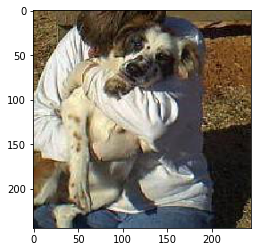

In [87]:
plt.imshow(img)

In [89]:
model.predict(preprocess_image(img))

1/1 [==============================] - 0s 18ms/step


array([[0., 1.]], dtype=float32)

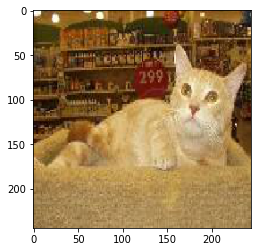

In [98]:
imgpath = random.sample(os.listdir('/content/test/'),1)[0]
imgpath = f'/content/test/{imgpath}'
img = keras.utils.load_img(imgpath, target_size = (244,244))
plt.imshow(img)

In [99]:
model.predict(preprocess_image(img))

1/1 [==============================] - 0s 21ms/step


array([[1.0000000e+00, 1.0250189e-16]], dtype=float32)

In [63]:
predict = model.predict(test_batches, batch_size= 32)

1250/1250 [==============================] - 97s 78ms/step


In [102]:
test_data['image_id'] = test_data['image_id'].apply(lambda x: x.split('.')[0])

In [120]:
pd.read_csv('/content/sample_submission.csv')

,id,label
0,1,0.5
1,2,0.5
2,3,0.5
3,4,0.5
4,5,0.5
...,...,...
12495,12496,0.5
12496,12497,0.5
12497,12498,0.5
12498,12499,0.5


In [117]:
result = pd.DataFrame()
result['id'] = test_data['image_id']
result['label'] = [np.argmax(i) for i in predict]

In [118]:
result.head()

,id,label
0,4704,0
1,2736,0
2,9919,1
3,9515,1
4,12269,1


In [123]:
result.to_csv('submission.csv',index = False)